In [1]:
from inspect import cleandoc
from PIL import Image
import cv2
import numpy as np
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plt
import csv

In [2]:
def imagePretreatment(imagePath):
    myImage = getImage(imagePath)
    imageBinarized = imageBinarize(myImage)
    thinnedImage = imageThin(imageBinarized)
    cleanedImage = imageClean(thinnedImage)
    resizedImage = imageResize(cleanedImage)
    imageArray = imageToArray(resizedImage)
    return imageArray

In [3]:
def imageResize(image):
    desiredSize = (28, 28)
    output = cv2.resize(image, desiredSize, interpolation=cv2.INTER_AREA)
    return output

In [4]:
def imageBinarize(image):
    # imgf contains Binary image
    return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 2)
    ret, imgf = cv2.threshold(image, 0, 255,cv2.THRESH_BINARY,cv2.THRESH_OTSU) #imgf contains Binary image
    return imgf

In [5]:
def imageThin(image):
    kernel = np.ones((2, 2), np.uint8)
    return cv2.erode(image, kernel, iterations=1)

In [6]:
def imageClean(image):
    return cv2.fastNlMeansDenoising(image, None, 5, 7, 21)

In [36]:
def getImage(imagePath):
    # read an image from a path and convert it to grayscale
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

In [8]:
def imageToArray(image):
    imageArray = []
    value = np.asarray(image)
    value = value.flatten()
    imageArray.extend(value)
    return imageArray

In [34]:
def displayImage(img, text):
    plt.imshow(img, cmap="gray")
    plt.title(text)
    plt.show()

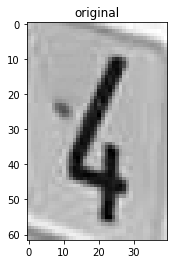

In [52]:
myImage = getImage("./../dataset/test/test2.png")
displayImage(myImage, "original")


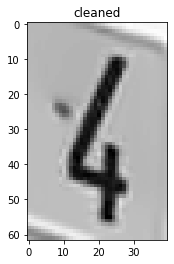

In [53]:
cleanedImage = imageClean(myImage)
displayImage(cleanedImage, "cleaned")


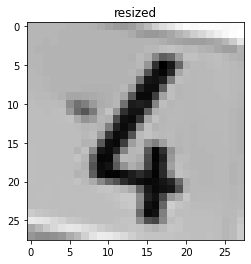

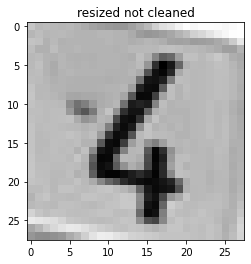

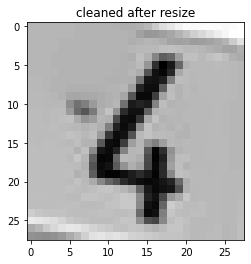

In [54]:
resizedImage = imageResize(cleanedImage)
resizedOriginal = imageResize(myImage)

displayImage(resizedImage, "resized")
displayImage(resizedOriginal, "resized not cleaned")
displayImage(imageClean(resizedOriginal), "cleaned after resize")


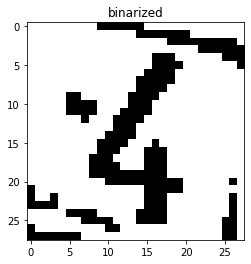

In [55]:
imageBinarized = imageBinarize(resizedImage)
displayImage(imageBinarized, "binarized")


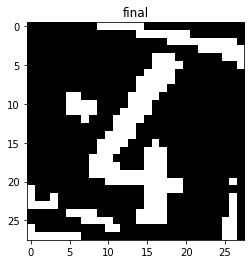

In [57]:
finalimage = cv2.subtract(255, imageBinarized)
displayImage(finalimage, "final")



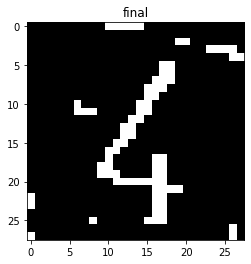

In [58]:
finalimagethinned = imageThin(finalimage)
displayImage(finalimagethinned, "final")

In [60]:
with open("./test.csv", "w", newline="") as f:
    writer = csv.writer(f)
    imageArray = [11]
    imageArray.extend(imageToArray(resizedImage))
    writer.writerow(imageArray)